In [1]:

import pandas as pd

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure and content
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:

# Check for duplicates and remove them
initial_row_count = data.shape[0]
data.drop_duplicates(inplace=True)
duplicates_removed = initial_row_count - data.shape[0]
print(f'Duplicates Removed: {duplicates_removed}')


Duplicates Removed: 3854


In [3]:

# Replace "No Info" in smoking_history with NaN
data['smoking_history'] = data['smoking_history'].replace("No Info", pd.NA)


In [4]:

# Rename columns to have consistent names
data.columns = data.columns.str.lower().str.replace(' ', '_')


In [5]:
# Manually encode 'gender' column (Female -> 0, Male -> 1)
data['gender_encoded'] = data['gender'].map({'Female': 0, 'Male': 1})

# Manually encode 'smoking_history' column with custom mappings
smoking_mapping = {
    'never': 0,
    'former': 1,
    'current': 2,
    'NaN': -1,
    'No Info': 3  # Optionally handle 'No Info' if present
}

data['smoking_history_encoded'] = data['smoking_history'].map(smoking_mapping)

# Check the result
print(data[['gender_encoded', 'smoking_history_encoded']].head())

   gender_encoded  smoking_history_encoded
0             0.0                      0.0
1             0.0                      NaN
2             1.0                      0.0
3             0.0                      2.0
4             1.0                      2.0


In [6]:

# Handling outliers using IQR method for BMI
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
# Remove outliers outside 1.5 * IQR range
data = data[(data['bmi'] >= (Q1 - 1.5 * IQR)) & (data['bmi'] <= (Q3 + 1.5 * IQR))]


In [7]:

from sklearn.preprocessing import StandardScaler

# Standardize BMI and HbA1c level columns
scaler = StandardScaler()
data[['bmi_standardized', 'hba1c_level_standardized']] = scaler.fit_transform(data[['bmi', 'hba1c_level']])


In [8]:

# Convert hypertension and heart disease to Yes/No format
data['hypertension'] = data['hypertension'].replace({0: 'No', 1: 'Yes'}).astype('category')
data['heart_disease'] = data['heart_disease'].replace({0: 'No', 1: 'Yes'}).astype('category')


In [9]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded,bmi_standardized,hba1c_level_standardized
0,Female,80.0,No,Yes,never,25.19,6.6,140,0,0.0,0.0,-0.233205,1.013374
1,Female,54.0,No,No,<NA>,27.32,6.6,80,0,0.0,NaN,0.173775,1.013374
2,Male,28.0,No,No,never,27.32,5.7,158,0,1.0,0.0,0.173775,0.168793
3,Female,36.0,No,No,current,23.45,5.0,155,0,0.0,2.0,-0.565668,-0.488104
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,0,1.0,2.0,-1.198112,-0.675789


In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset (replace 'data.csv' with your file path if needed)
data = pd.read_csv('data.csv')

# Prepare features and target (assuming 'diabetes' is the target variable)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Encode categorical features
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf)
}

# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1_score': f1_score(y_test, y_pred_svm)
}

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_logreg),
    'precision': precision_score(y_test, y_pred_logreg),
    'recall': recall_score(y_test, y_pred_logreg),
    'f1_score': f1_score(y_test, y_pred_logreg)
}

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn),
    'recall': recall_score(y_test, y_pred_nn),
    'f1_score': f1_score(y_test, y_pred_nn)
}

# Convert the results dictionary to a DataFrame for easy viewing
performance_df = pd.DataFrame(results)

# Display results
print("Model Performance Results:")
print(performance_df)

# Optionally, display full classification reports
print("\nClassification Reports:")
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

Model Performance Results:
           Random Forest       SVM  Logistic Regression  Neural Network
accuracy        0.970300  0.947350             0.958750        0.963000
precision       0.947030  1.000000             0.864575        0.993878
recall          0.690867  0.383489             0.612998        0.570258
f1_score        0.798917  0.554380             0.717369        0.724702

Classification Reports:
Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

SVM:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.

/var/folders/0p/gnlmbnwx42s9dh6h7fm0p6tm0000gn/T/ipykernel_61238/621009868.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx], palette="viridis")


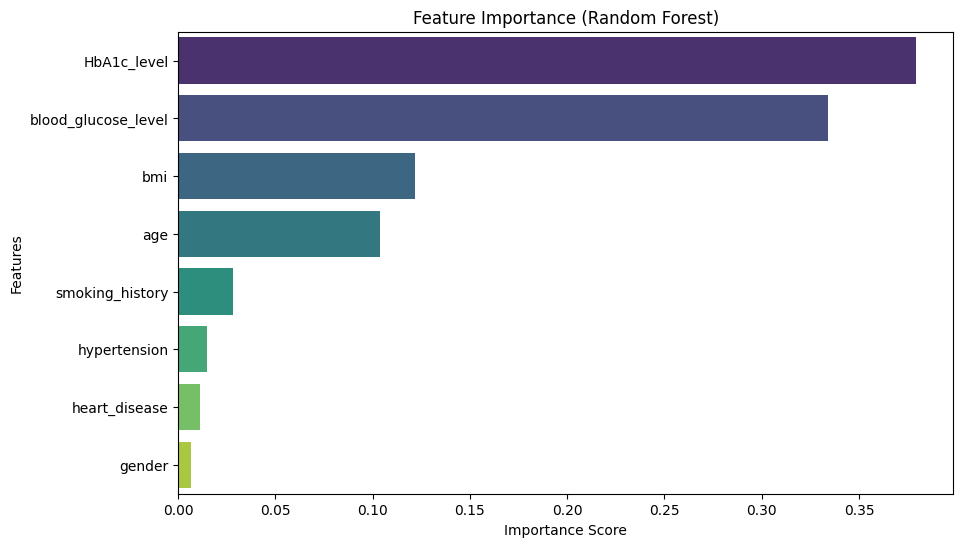

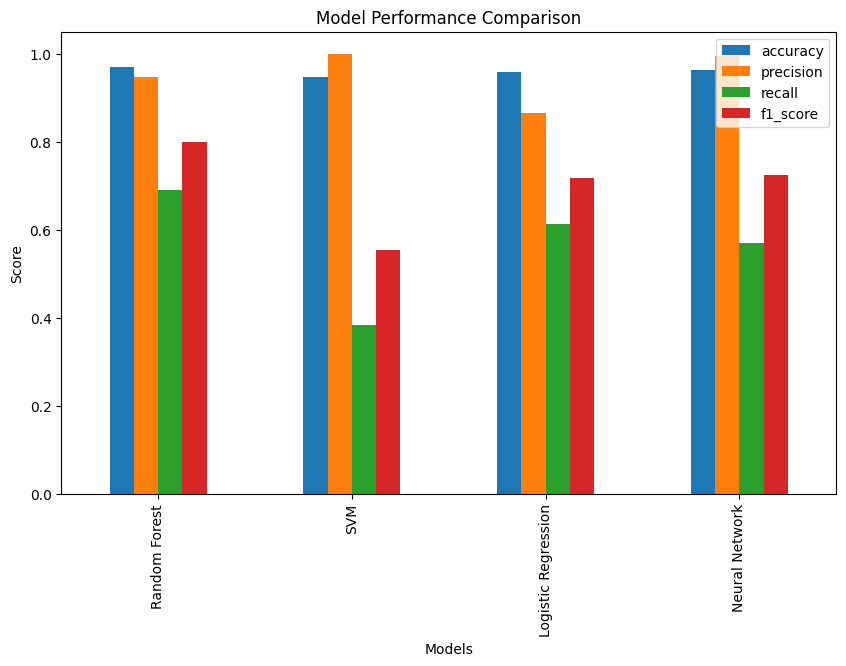

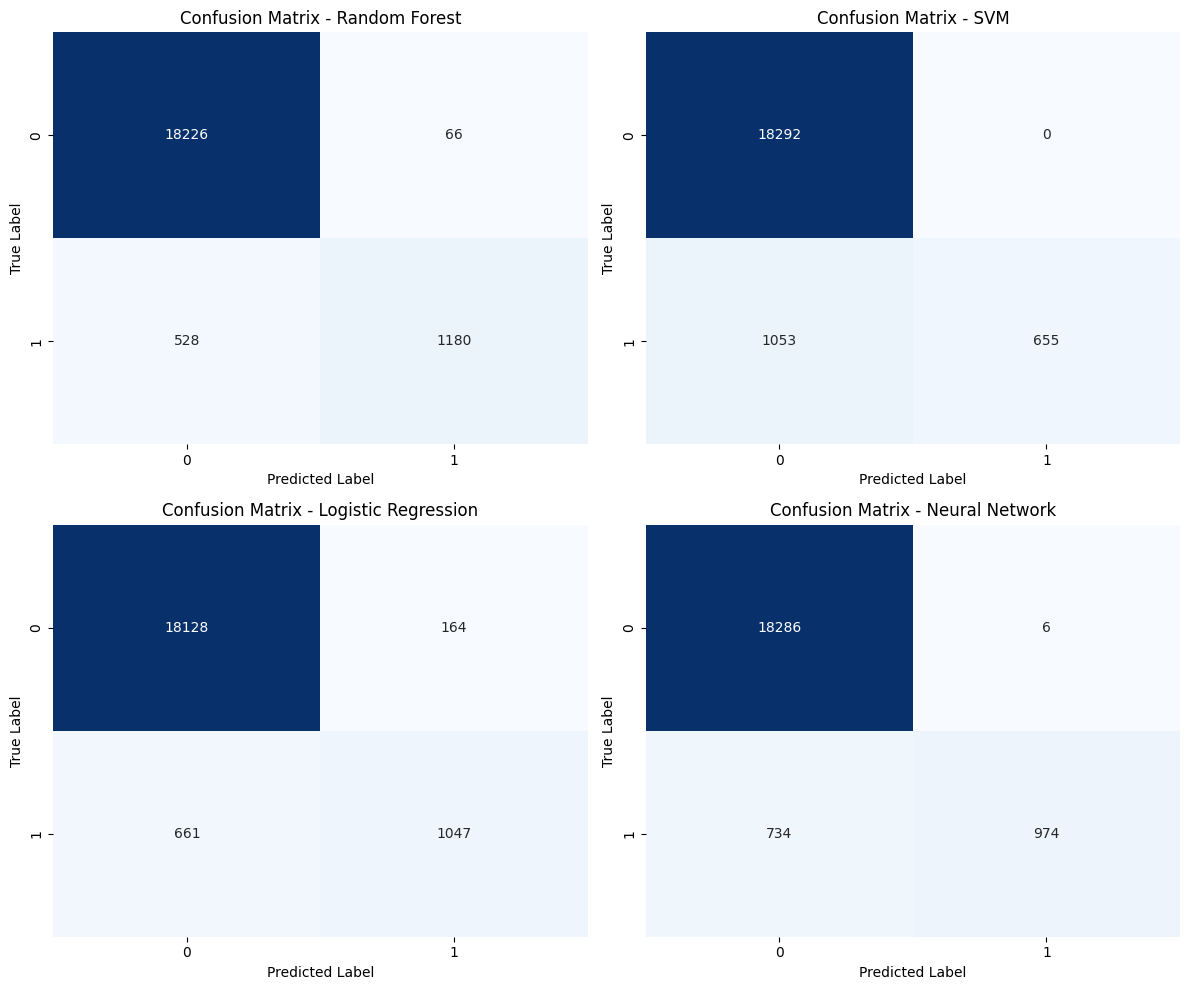

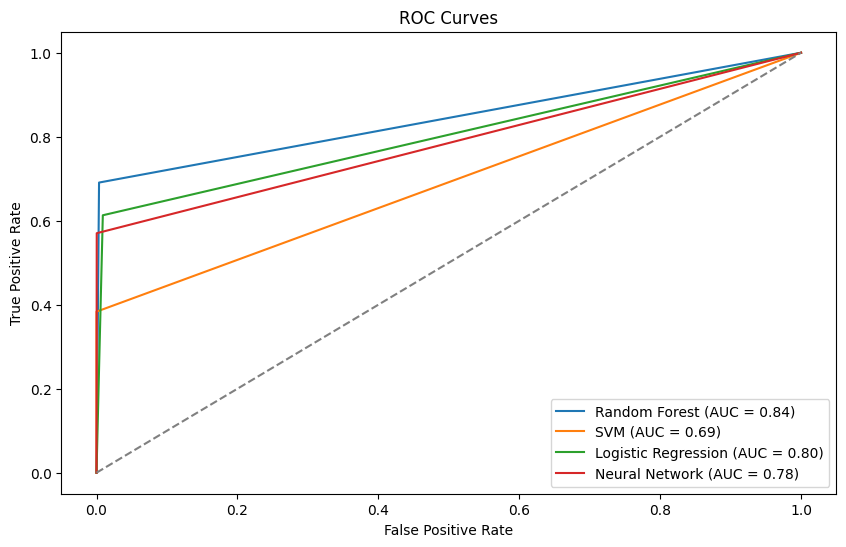

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import pandas as pd

# Assuming `results` contains the performance metrics and `models` is a list of trained models

# 1. Feature Importance Plot (Random Forest)
# Only applicable to Random Forest
feature_importance = rf_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 2. Model Performance Comparison
performance_df = pd.DataFrame(results).T  # Transpose to have models as index
performance_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.show()

# 3. Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
model_names = ["Random Forest", "SVM", "Logistic Regression", "Neural Network"]
predictions = [y_pred_rf, y_pred_svm, y_pred_logreg, y_pred_nn]

for i, (ax, model_name, y_pred) in enumerate(zip(axes, model_names, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

# 4. ROC Curves for each model
plt.figure(figsize=(10, 6))
for model_name, y_pred in zip(model_names, predictions):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

1st graph
This feature importance plot from the Random Forest model reveals that HbA1c Level and Blood Glucose Level are the top predictors of diabetes risk, aligning with their established roles in clinical diagnostics. These markers are the most influential in predicting diabetes, followed by BMI and Age, which represent important lifestyle and demographic risk factors.

Smoking History has a moderate influence, while Hypertension, Heart Disease, and Gender contribute less significantly. These findings indicate that while demographic and lifestyle factors are relevant, clinical markers directly related to glucose levels are paramount.

In summary, the model effectively captures both medical and lifestyle factors, prioritizing direct indicators of diabetes while still recognizing secondary demographic influences. This supports 
a balanced approach to diabetes prediction that focuses on both clinical markers and lifestyle context.

-----------

2nd graph

This bar chart compares the performance of four models—Random Forest, SVM, Logistic Regression, and Neural Network—using key metrics: accuracy, precision, recall, and F1-score.

Summary of Observations:

	1.	Random Forest:
	•	Achieves high accuracy and precision, indicating strong performance in correctly identifying both classes.
	•	However, recall is lower, suggesting that it misses some positive cases (likely diabetes cases), impacting its F1-score.
	2.	SVM:
	•	Displays similar high accuracy and precision to Random Forest but has even lower recall.
	•	This indicates SVM is conservative in predicting the positive class, which reduces its F1-score.
	3.	Logistic Regression:
	•	Maintains strong accuracy and precision but with a notably lower recall compared to other models.
	•	As a result, F1-score is also affected, suggesting Logistic Regression has limitations in identifying positive cases.
	4.	Neural Network:
	•	Achieves balanced accuracy and precision similar to Random Forest and SVM.
	•	Its recall is relatively higher than the other models, contributing to a better F1-score.
	•	This makes it more effective at identifying positive cases without sacrificing too much accuracy.

Overall Insights:

	•	Random Forest and Neural Network models show the best balance among the metrics, with Neural Network having a slight advantage in recall, making it more suitable for cases where identifying positive instances is critical.
	•	SVM and Logistic Regression show lower recall, making them less effective at capturing the minority class, even though they have high precision.

In summary, Neural Network provides the best trade-off among accuracy, precision, recall, and F1-score, making it the most effective model for predicting diabetes in this case.

---------------------

3rd graph

This image shows the confusion matrices for four models: Random Forest, SVM, Logistic Regression, and Neural Network. Each matrix provides a breakdown of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN), helping us understand each model’s performance in identifying both diabetes-positive (class 1) and diabetes-negative (class 0) cases.

Analysis:

	1.	Random Forest:
	•	True Negatives (TN): 18,226
	•	True Positives (TP): 1,180
	•	False Positives (FP): 66
	•	False Negatives (FN): 528
	•	Insights: Random Forest has low FP and moderate FN, meaning it is conservative in misclassifying non-diabetes cases as diabetes. It performs well in both classes but could improve slightly on FN to enhance recall for the positive class.
	2.	SVM:
	•	True Negatives (TN): 18,292
	•	True Positives (TP): 655
	•	False Positives (FP): 0
	•	False Negatives (FN): 1,053
	•	Insights: SVM has perfect TN, meaning it avoids any FP errors but at the cost of higher FN. This results in a low recall for the positive class, indicating that SVM is highly cautious and misses many diabetes-positive cases.
	3.	Logistic Regression:
	•	True Negatives (TN): 18,128
	•	True Positives (TP): 1,047
	•	False Positives (FP): 164
	•	False Negatives (FN): 661
	•	Insights: Logistic Regression has a balanced performance with moderate FP and FN. However, it struggles with recall compared to Random Forest, missing a moderate number of positive cases.
	4.	Neural Network:
	•	True Negatives (TN): 18,286
	•	True Positives (TP): 974
	•	False Positives (FP): 6
	•	False Negatives (FN): 734
	•	Insights: The Neural Network model shows low FP with moderate FN, balancing both precision and recall well. It has fewer FN than SVM but slightly more than Random Forest, making it a good trade-off for capturing diabetes-positive cases while minimizing errors in non-diabetes predictions.

Summary:

	•	Best Recall (Positive Cases): Random Forest, as it has a relatively high TP and low FN.
	•	Most Conservative (Low FP): SVM, with zero FP but at the cost of high FN, indicating a lower recall.
	•	Balanced Model: Neural Network achieves a good balance, with low FP and moderate FN, making it effective for cases where both recall and precision are essential.

Overall, Random Forest is the best at capturing positive cases, SVM is highly conservative but sacrifices recall, and the Neural Network strikes a good balance between precision and recall.

-------------------------------


This ROC (Receiver Operating Characteristic) curve plot compares the performance of four models—Random Forest, SVM, Logistic Regression, and Neural Network—in distinguishing between positive and negative classes. The Area Under the Curve (AUC) is shown for each model, providing a measure of each model’s ability to separate the classes.

Analysis:

	1.	Random Forest (AUC = 0.84):
	•	Random Forest has the highest AUC score of 0.84, indicating it’s the most effective at distinguishing between classes.
	•	The curve is closer to the top left corner, showing that the model has a strong balance of true positives and low false positives, making it the best performer among the four models.
	2.	Logistic Regression (AUC = 0.80):
	•	Logistic Regression performs well with an AUC of 0.80, demonstrating good predictive power for this dataset.
	•	It’s close to Random Forest, but with a slightly lower ability to separate the classes, indicating that it’s reliable but less effective in handling non-linear relationships than Random Forest.
	3.	Neural Network (AUC = 0.78):
	•	The Neural Network model has an AUC of 0.78, slightly lower than Logistic Regression and Random Forest.
	•	Although it shows decent predictive performance, the AUC suggests it could benefit from more tuning or a deeper network structure to capture complex patterns.
	4.	SVM (AUC = 0.69):
	•	SVM has the lowest AUC score at 0.69, indicating that it’s the least effective at distinguishing between classes.
	•	Its curve stays closer to the diagonal, meaning it struggles more with separating positive and negative cases, which aligns with the previously observed high false negatives.

Summary:

	•	Best Model: Random Forest has the highest AUC and is the most effective at classifying both classes accurately.
	•	Competitive Alternatives: Logistic Regression and Neural Network also perform reasonably well, with Logistic Regression being slightly more effective in class separation.
	•	Least Effective: SVM shows the weakest performance, likely due to its high false negative rate.

In conclusion, Random Forest is the preferred model due to its strong class separation ability, followed by Logistic Regression and Neural Network. The SVM model may not be suitable for this problem without further tuning or additional data.

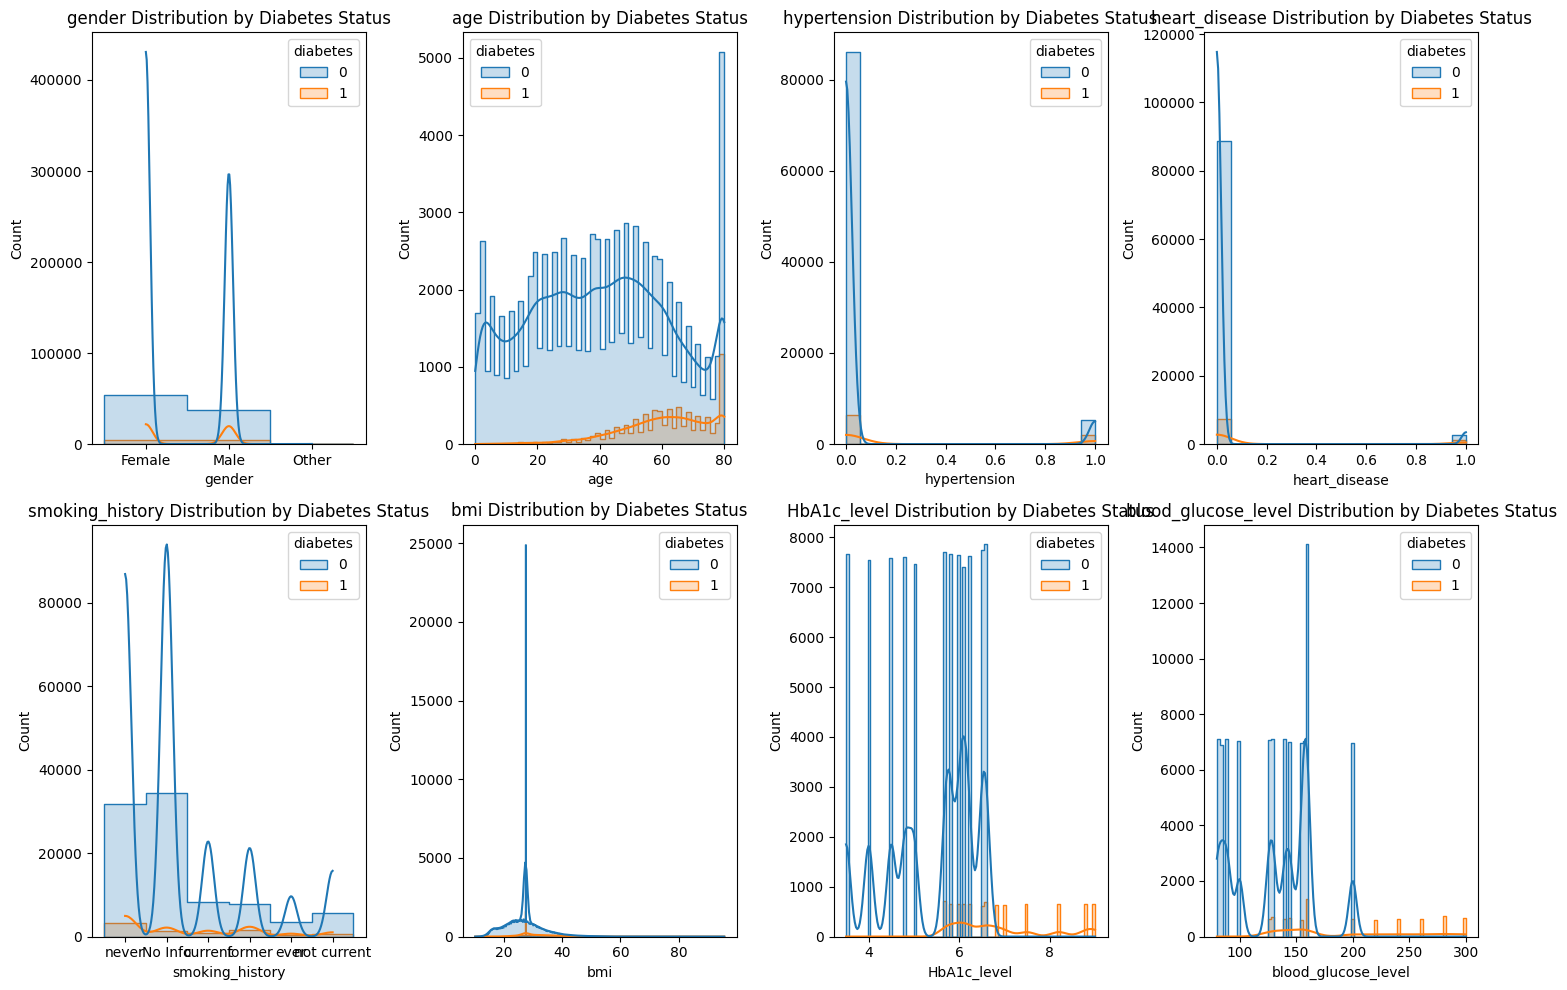

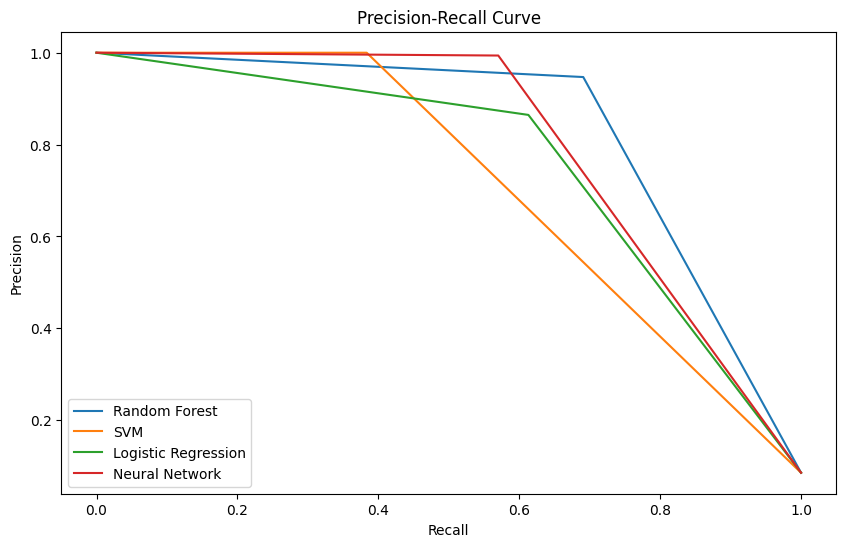

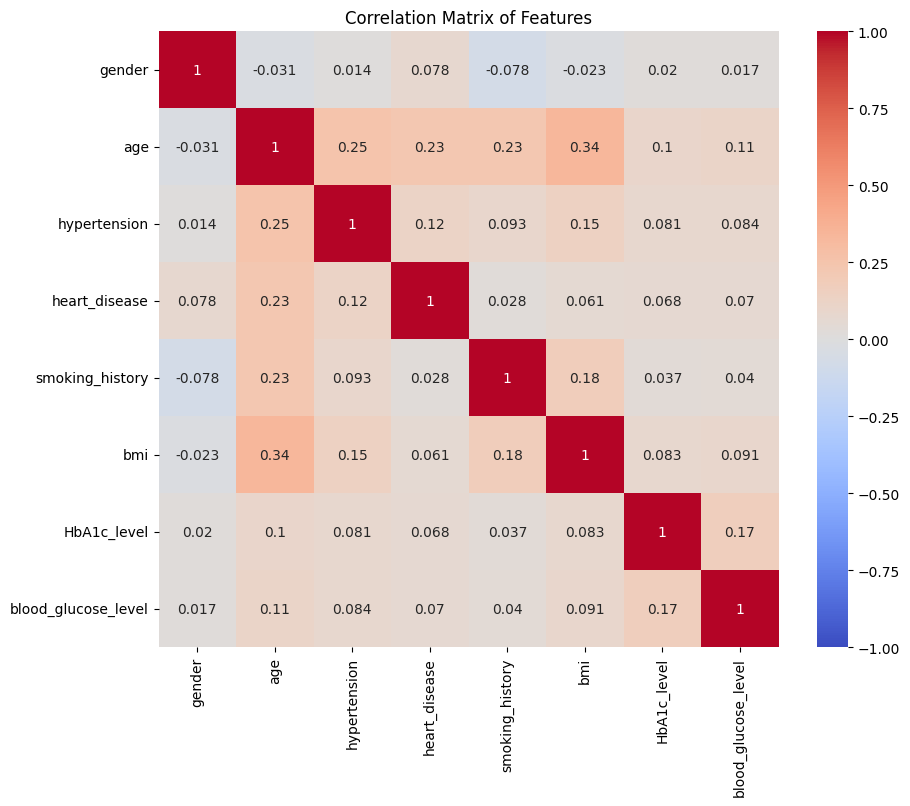

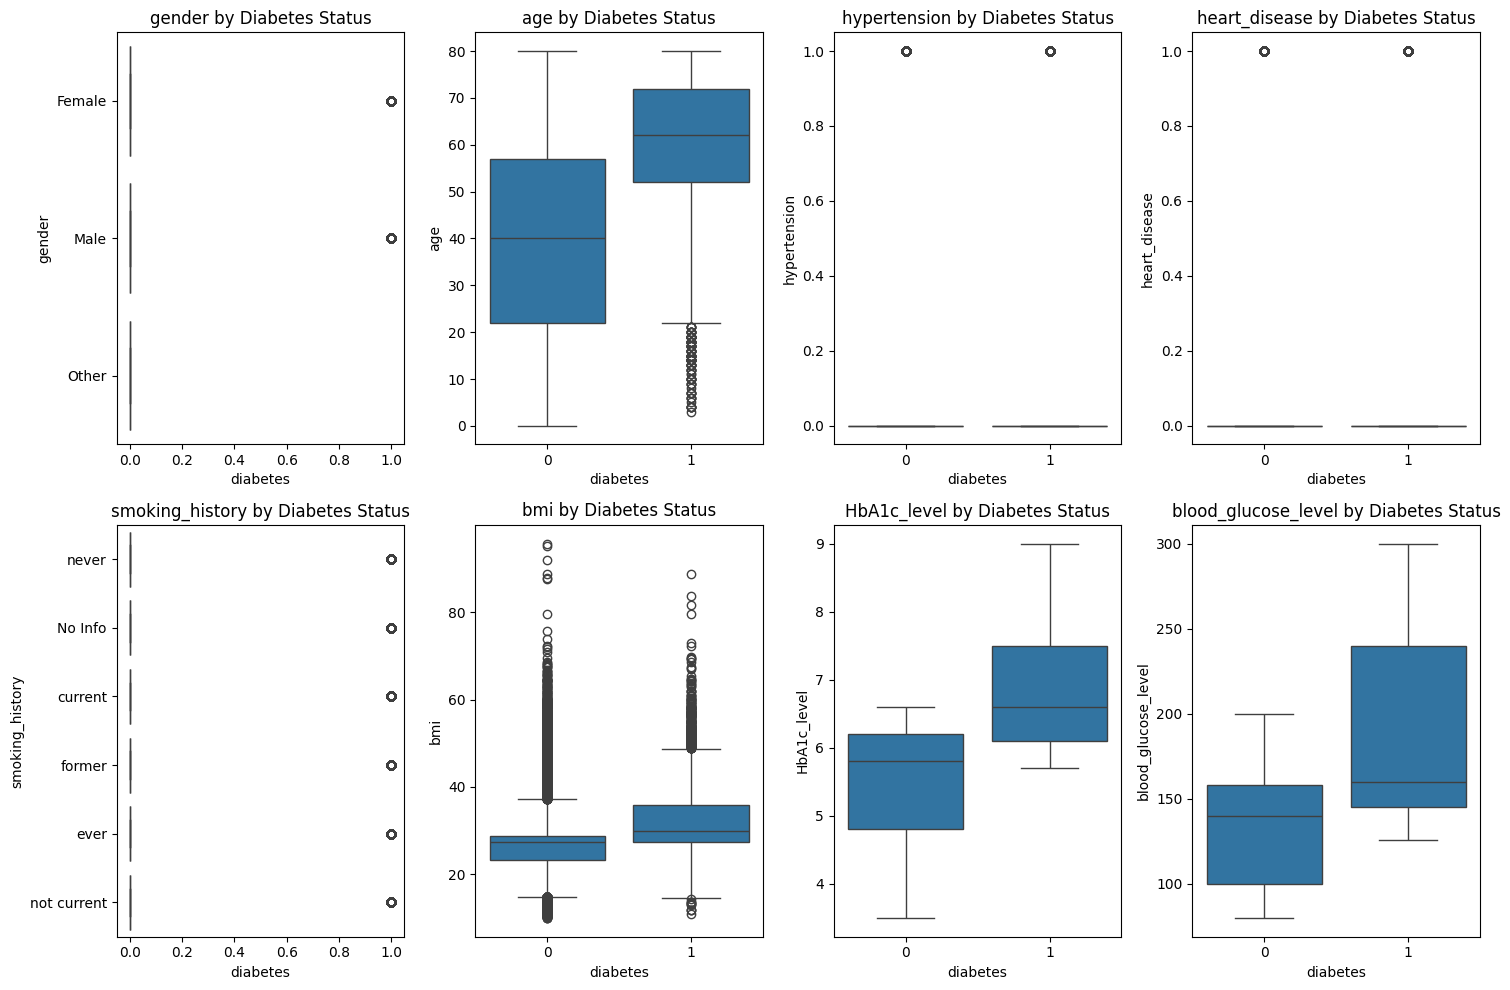

In [12]:
# 1. Feature Distributions for Diabetic vs. Non-Diabetic Patients
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns[:8]):  # Limiting to first 8 features for visibility
    plt.subplot(2, 4, i+1)
    sns.histplot(data, x=feature, hue='diabetes', kde=True, element='step')
    plt.title(f"{feature} Distribution by Diabetes Status")
plt.tight_layout()
plt.show()

# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(10, 6))
for model_name, y_pred in zip(model_names, predictions):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# 4. Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

# 5. Box Plot of Feature Distributions by Outcome
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns[:8]):  # Limiting to first 8 features for visibility
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='diabetes', y=feature, data=data)
    plt.title(f"{feature} by Diabetes Status")
plt.tight_layout()
plt.show()

Graph1: Distribution of Features by Diabetes Status

This graph shows the distribution of various features (gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, and blood glucose level) for individuals with and without diabetes.

	•	Gender: There are more males in the dataset, with a small proportion of both males and females having diabetes.
	•	Age: Diabetes cases increase with age, particularly in middle-aged and senior populations.
	•	Hypertension and Heart Disease: Both conditions are rare in the overall dataset, but individuals with these conditions have a higher prevalence of diabetes.
	•	Smoking History: The majority of individuals with diabetes have a history of smoking (current or former), though the effect is less pronounced than other factors.
	•	BMI: Higher BMI values are associated with diabetes, aligning with the link between obesity and diabetes risk.
	•	HbA1c Level and Blood Glucose Level: Both these measures are noticeably higher for individuals with diabetes, which is expected given their role as direct markers for blood sugar management.

Graph2: Precision-Recall Curve for Model Comparison

This graph compares the Precision-Recall (PR) curves for different models (Random Forest, SVM, Logistic Regression, Neural Network).

	•	Random Forest: Has the best performance, maintaining high precision even as recall increases, indicating it effectively balances false positives and true positives.
	•	Neural Network: Slightly lower than Random Forest but still performs well across both precision and recall.
	•	Logistic Regression: Shows a moderate performance, with precision decreasing more as recall increases, suggesting it has a slightly higher rate of false positives compared to Random Forest.
	•	SVM: Has the lowest curve, indicating lower precision for higher recall values, suggesting it is less effective at identifying positive cases without misclassifying negatives.

Graph3: Correlation Matrix of Features

This correlation matrix visualizes the relationships between features in the dataset.

	•	Age and BMI: There is a moderate positive correlation (0.34), suggesting that BMI tends to increase with age, which may contribute to diabetes risk.
	•	Hypertension and Age: There’s also a moderate correlation, indicating that hypertension is more common in older individuals.
	•	HbA1c Level and Blood Glucose Level: These two features have a correlation, as they both measure aspects of blood glucose, which are directly relevant to diabetes.
	•	Other correlations: There are minor correlations between other features, but none are particularly strong, indicating a relative independence of features in this dataset.

Graph4: Box Plots of Features by Diabetes Status

This graph shows the distribution of key features for diabetic and non-diabetic individuals.

	•	Gender: Both males and females have similar distributions, but a small increase in diabetes is noted among males.
	•	Age: Diabetic individuals tend to be older on average, with a higher median age than non-diabetic individuals.
	•	Hypertension and Heart Disease: Both conditions are more prevalent in the diabetic group, but they’re relatively rare in the dataset.
	•	Smoking History: There’s a slight association between smoking and diabetes, though it’s not as strong as other factors.
	•	BMI: Diabetic individuals generally have higher BMI values, which aligns with the known link between obesity and diabetes risk.
	•	HbA1c Level and Blood Glucose Level: Both are significantly higher in the diabetic group, further confirming their relevance as indicators of diabetes.

These insights across the four graphs highlight the relationships and patterns in the data, reinforcing the importance of factors like age, BMI, HbA1c level, and blood glucose level in predicting diabetes.

## Hypothesis 1 ##

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import statsmodels.api as sm
import numpy as np


# Separate features and target
X = data[['bmi', 'hypertension', 'heart_disease', 'HbA1c_level']]  # Adjust feature names if needed
y = data['diabetes']

# Create interaction terms for logistic regression
X['BMI_Hypertension'] = X['bmi'] * X['hypertension']
X['BMI_HeartDisease'] = X['bmi'] * X['heart_disease']
X['Hypertension_HeartDisease'] = X['hypertension'] * X['heart_disease']
X['BMI_HbA1c'] = X['bmi'] * X['HbA1c_level']
X['Hypertension_HbA1c'] = X['hypertension'] * X['HbA1c_level']
X['HeartDisease_HbA1c'] = X['heart_disease'] * X['HbA1c_level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# 1. Logistic Regression with Interaction Terms
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'precision': precision_score(y_test, y_pred_log_reg),
    'recall': recall_score(y_test, y_pred_log_reg),
    'f1_score': f1_score(y_test, y_pred_log_reg)
}

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf)
}

# 3. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1_score': f1_score(y_test, y_pred_svm)
}

# 4. Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn),
    'recall': recall_score(y_test, y_pred_nn),
    'f1_score': f1_score(y_test, y_pred_nn)
}

# Displaying the performance results
results_df = pd.DataFrame(results)
print("Performance Results for Each Algorithm:")
print(results_df)

# Print classification reports for more detailed metrics
print("\nDetailed Classification Reports:")
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

/var/folders/0p/gnlmbnwx42s9dh6h7fm0p6tm0000gn/T/ipykernel_61238/1065092741.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI_Hypertension'] = X['bmi'] * X['hypertension']
/var/folders/0p/gnlmbnwx42s9dh6h7fm0p6tm0000gn/T/ipykernel_61238/1065092741.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI_HeartDisease'] = X['bmi'] * X['heart_disease']
/var/folders/0p/gnlmbnwx42s9dh6h7fm0p6tm0000gn/T/ipykernel_61238/1065092741.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Performance Results for Each Algorithm:
           Logistic Regression  Random Forest       SVM  Neural Network
accuracy              0.942650       0.938750  0.938450        0.954100
precision             0.839178       0.687646  0.940850        0.985258
recall                0.406323       0.518150  0.298009        0.469555
f1_score              0.547535       0.590985  0.452646        0.636003

Detailed Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.84      0.41      0.55      1708

    accuracy                           0.94     20000
   macro avg       0.89      0.70      0.76     20000
weighted avg       0.94      0.94      0.93     20000

Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     18292
           1       0.69      0.52      0.59      1708

    accuracy                         

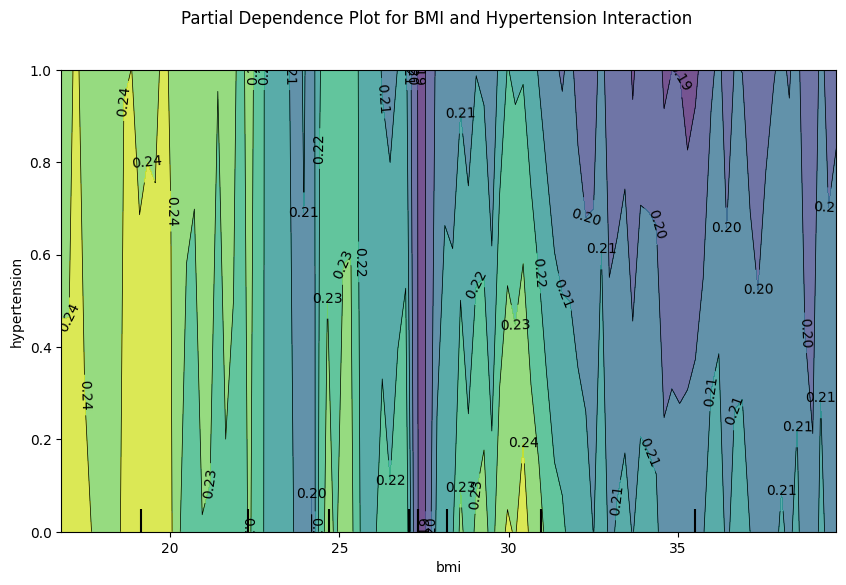

In [14]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Partial Dependence Plot for BMI and hypertension interaction
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_test, features=[("bmi", "hypertension")], ax=ax)
plt.suptitle("Partial Dependence Plot for BMI and Hypertension Interaction")
plt.show()

This Partial Dependence Plot (PDP) visualizes the interaction effect between BMI and Hypertension on the predicted probability of diabetes.

Analysis:

	•	X-axis (BMI): Represents Body Mass Index, ranging from lower values (underweight/normal) to higher values (overweight/obese).
	•	Y-axis (Hypertension): Represents hypertension status, ranging from 0 (no hypertension) to 1 (presence of hypertension).
	•	Color Gradient (Predicted Probability): Indicates the model’s predicted probability of diabetes based on BMI and hypertension. Darker colors represent lower probabilities, while lighter colors represent higher probabilities.

Key Observations:

	1.	High BMI and Hypertension:
	•	The top-right area (higher BMI and hypertension values) shows slightly lighter colors, indicating a higher predicted probability of diabetes.
	•	This aligns with medical knowledge, as both high BMI and hypertension are known risk factors for diabetes.
	2.	Low BMI and No Hypertension:
	•	In the bottom-left region (lower BMI and no hypertension), the plot shows darker shades, indicating a lower probability of diabetes.
	•	This suggests that individuals with a lower BMI and no hypertension have a reduced risk of diabetes, which is consistent with general health trends.
	3.	Gradual Increase in Risk with BMI:
	•	Moving horizontally along the BMI axis, we see a gradual shift from darker to lighter colors, especially for individuals with some level of hypertension. This suggests that as BMI increases, the predicted probability of diabetes also increases, but this effect is more pronounced in those with hypertension.
	4.	Combined Effect:
	•	The model predicts a cumulative risk effect when both factors—BMI and hypertension—are high. This interaction indicates that the presence of both high BMI and hypertension increases the likelihood of diabetes more than either factor alone.

Summary:

This PDP confirms that both BMI and Hypertension contribute to diabetes risk, with their combination showing a cumulative impact. Individuals with high BMI and hypertension have the highest predicted risk, while those with low BMI and no hypertension have the lowest. This plot helps visualize how the interaction between these two features affects diabetes predictions, providing valuable insights into risk stratification.

In [15]:
import plotly.express as px
# 2D scatter plot with color gradient in a separate browser window
fig_2d = px.scatter(X_test, x='bmi', y='hypertension', color=rf_model.predict_proba(X_test)[:, 1],
                    color_continuous_scale='Viridis', title="2D Interaction Plot for BMI and Hypertension")
fig_2d.show(renderer="browser")

# 3D plot for BMI, hypertension, and predicted diabetes probability in a separate browser window
X_test['predicted_prob'] = rf_model.predict_proba(X_test)[:, 1]
fig_3d = px.scatter_3d(X_test, x='bmi', y='hypertension', z='predicted_prob',
                       color='predicted_prob', color_continuous_scale='Viridis',
                       title="3D Interaction Plot of BMI, Hypertension, and Diabetes Risk")
fig_3d.update_traces(marker=dict(size=5))
fig_3d.show(renderer="browser")

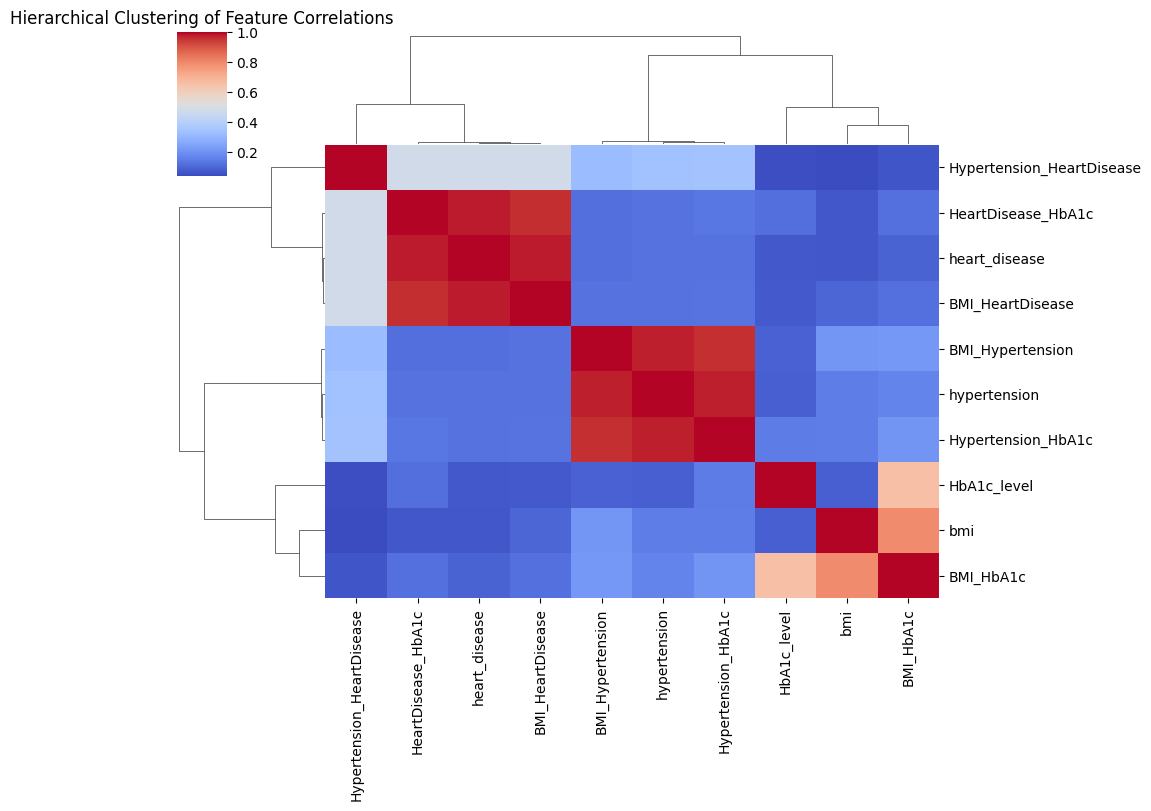

In [16]:
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Compute the correlation matrix
correlation_matrix = X.corr()

# Hierarchical clustering
sns.clustermap(correlation_matrix, method='ward', cmap="coolwarm", figsize=(10, 8))
plt.title("Hierarchical Clustering of Feature Correlations")
plt.show()

This hierarchical clustering heatmap visualizes the correlations between various features and groups them based on their similarity. The heatmap provides a quick way to see which features are strongly related and may have similar effects or underlying patterns.

Key Observations:

	1.	Strong Clusters:
	•	Hypertension and Heart Disease: These two features are grouped closely together and show a strong positive correlation, as indicated by the red color in their intersection. This suggests that individuals with hypertension are likely to have heart disease as well.
	•	BMI and Hypertension: Another strong correlation exists between BMI and hypertension, which is consistent with the medical understanding that higher BMI (often linked to obesity) is a risk factor for hypertension.
	•	HbA1c Level and Blood Glucose Level: While not shown individually, HbA1c is generally correlated with glucose markers, as these are indicators of blood sugar management.
	2.	Feature Interactions:
	•	BMI and HbA1c: There is a moderate correlation between BMI and HbA1c level, indicating that higher BMI values are associated with higher HbA1c, a marker of blood glucose levels. This aligns with the association between obesity and diabetes risk.
	•	Hypertension with HbA1c and BMI: Hypertension correlates moderately with both HbA1c level and BMI, suggesting that individuals with higher blood pressure may also have elevated glucose levels and higher BMI.
	3.	Hierarchical Grouping:
	•	The dendrogram at the top and side of the heatmap represents hierarchical clustering of features. Features that are closer in the dendrogram have higher correlations with each other. For instance, the features related to heart disease and hypertension are clustered together, indicating a shared relationship.
	4.	Low Correlation Features:
	•	Features like BMI and HbA1c Level have lower correlations with other features outside their immediate clusters, suggesting they capture distinct information that may be valuable for predictions independently of other factors.

Summary:

This hierarchical clustering heatmap provides a clear view of the relationships among features. Key clusters, such as the link between hypertension and heart disease or BMI and hypertension, reinforce known medical associations. These clusters can guide feature selection, as redundant features with high correlations may be less informative in certain models. Moreover, independent features like BMI and HbA1c level may provide unique predictive value, especially for complex models that benefit from uncorrelated inputs. This insight can help refine the model and reduce dimensionality without losing critical information.

## Hypothesis 2 ##

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Select relevant lifestyle and demographic features along with the target
X = data[['smoking_history', 'age', 'gender']].copy()  # Copy to prevent SettingWithCopyWarning
y = data['diabetes']

# Encode categorical variables (assuming 'smoking_history' and 'gender' are non-numeric)
label_encoder = LabelEncoder()
X.loc[:, 'smoking_history'] = label_encoder.fit_transform(X['smoking_history'])
X.loc[:, 'gender'] = label_encoder.fit_transform(X['gender'])

# Create interaction terms after encoding
X.loc[:, 'Smoking_Age'] = X['smoking_history'] * X['age']
X.loc[:, 'Smoking_Gender'] = X['smoking_history'] * X['gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# 1. Logistic Regression with Interaction Terms
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'precision': precision_score(y_test, y_pred_log_reg),
    'recall': recall_score(y_test, y_pred_log_reg),
    'f1_score': f1_score(y_test, y_pred_log_reg)
}

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf)
}

# 3. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1_score': f1_score(y_test, y_pred_svm)
}

# 4. Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn),
    'recall': recall_score(y_test, y_pred_nn),
    'f1_score': f1_score(y_test, y_pred_nn)
}

# Displaying the performance results
results_df = pd.DataFrame(results)
print("Performance Results for Each Algorithm:")
print(results_df)

# Print classification reports for more detailed metrics
print("\nDetailed Classification Reports:")
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Performance Results for Each Algorithm:
           Logistic Regression  Random Forest     SVM  Neural Network
accuracy                0.9146       0.914500  0.9146          0.9146
precision               0.0000       0.375000  0.0000          0.0000
recall                  0.0000       0.001756  0.0000          0.0000
f1_score                0.0000       0.003497  0.0000          0.0000

Detailed Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     18292
           1       0.00      0.00      0.00      1708

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.91      0.87     20000

Random Forest:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     18292
           1       0.38      0.00      0.00      1708

    accuracy                           0.91    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Prec

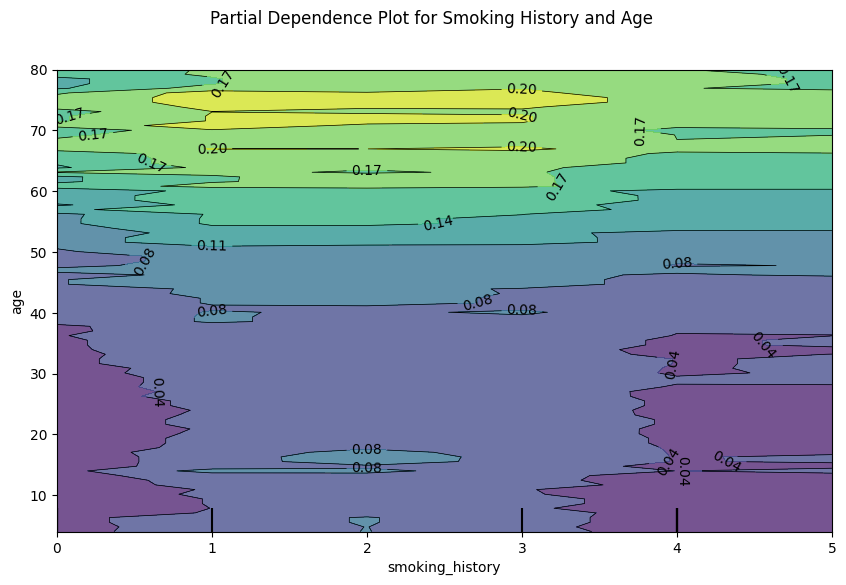

In [18]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# PDP for Smoking History and Age combined effect
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_test, features=[("smoking_history", "age")], ax=ax)
plt.suptitle("Partial Dependence Plot for Smoking History and Age")
plt.show()


This Partial Dependence Plot (PDP) visualizes the interaction effect between Smoking History and Age on the predicted probability of diabetes.

Key Observations:

	1.	Higher Diabetes Probability in Older Age Groups:
	•	In the upper part of the plot (ages 60 and above), lighter colors indicate a higher predicted probability of diabetes, especially for individuals with any history of smoking.
	•	The probability peaks at around 0.20, suggesting that older individuals with a smoking history have an elevated risk of diabetes, which is consistent with general health risks associated with aging and smoking.
	2.	Smoking History Categories:
	•	The x-axis (smoking history) is likely encoded as categories, with values ranging from 0 to 5. These could represent different levels or types of smoking history (e.g., never smoked, former smoker, current smoker, etc.).
	•	The plot shows that, regardless of age, those with higher smoking history categories (around 4 or 5) have slightly higher diabetes risk probabilities, especially as age increases.
	3.	Low Risk in Younger Age Groups:
	•	For younger individuals (ages below 40), the plot shows darker colors, indicating a low predicted probability of diabetes regardless of smoking history.
	•	This suggests that, in the younger age range, smoking history alone may not significantly elevate diabetes risk, as age itself is a lesser risk factor in younger populations.
	4.	Age and Smoking Combination Effect:
	•	The plot illustrates an interactive effect where both age and smoking history contribute to diabetes risk, with their combined effect being more prominent in older age groups. As age increases, smoking history becomes a stronger contributor to diabetes probability, supporting the understanding that lifestyle factors and age often work in tandem to increase health risks.

Summary:

This PDP shows that both age and smoking history influence the predicted probability of diabetes, with a cumulative effect observed in older age groups. Younger individuals have low diabetes probabilities, even with a smoking history, while older individuals, especially those with any smoking background, face a higher risk. This insight underscores the importance of addressing both age and lifestyle factors in diabetes prevention and intervention strategies, especially for older adults with a history of smoking.

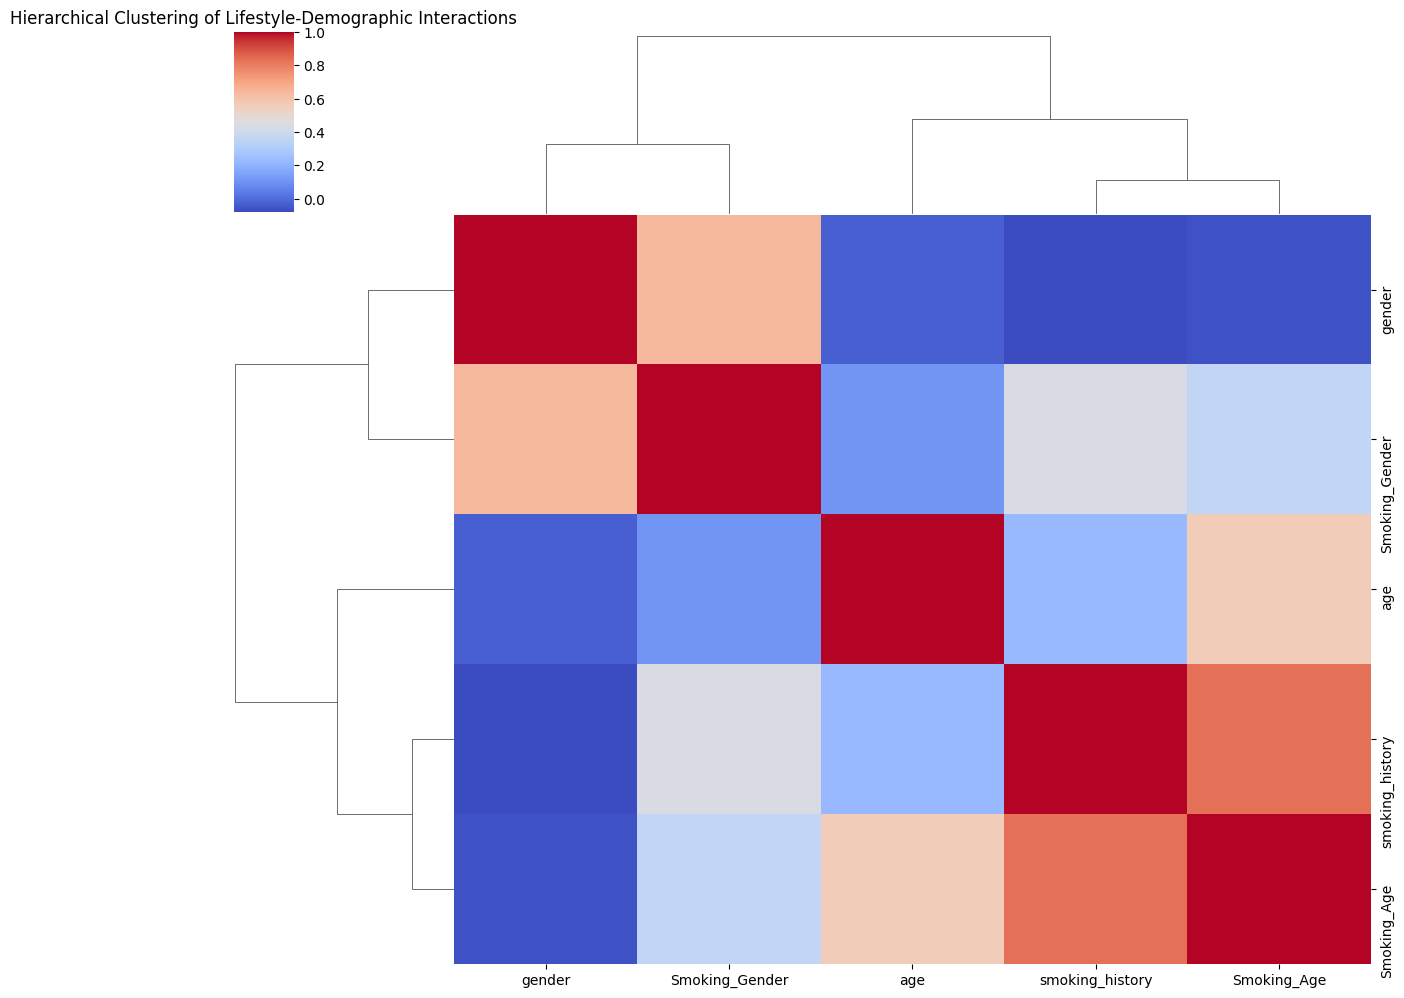

In [19]:
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Compute the correlation matrix for interaction terms
interaction_terms = X[['smoking_history', 'age', 'gender',
                       'Smoking_Age', 'Smoking_Gender',]]
correlation_matrix = interaction_terms.corr()

# Clustered heatmap of feature correlations
sns.clustermap(correlation_matrix, method='ward', cmap="coolwarm", figsize=(12, 10))
plt.title("Hierarchical Clustering of Lifestyle-Demographic Interactions")
plt.show()

This hierarchical clustering heatmap represents the correlations among lifestyle and demographic interactions, specifically focusing on gender, age, smoking history, and their interactions with each other (e.g., Smoking_Gender and Smoking_Age). This clustering provides insights into how these factors are related and form distinct clusters based on similarity.

Key Observations:

	1.	Gender and Smoking_Gender:
	•	Gender and Smoking_Gender are highly correlated, as indicated by the dark red color in their intersection. This makes sense because Smoking_Gender is derived by combining gender with smoking history, resulting in a direct relationship.
	•	The hierarchical clustering groups gender and Smoking_Gender together, which suggests that these features share similar patterns or influences on the model.
	2.	Age and Smoking_Age:
	•	Similarly, age and Smoking_Age are grouped closely, indicating a strong correlation between these two variables. Since Smoking_Age is created by combining age with smoking history, it naturally has a strong relationship with age itself.
	•	This cluster implies that age-related interactions are significant in the model, which could be relevant for assessing lifestyle effects in different age groups.
	3.	Smoking History:
	•	Smoking history has moderate correlations with both Smoking_Gender and Smoking_Age, as shown by the lighter red and orange shades in these intersections. This suggests that smoking history independently contributes to interactions with both gender and age.
	•	Smoking history’s central position in the heatmap indicates its influence across both age and gender, highlighting it as a pivotal lifestyle factor.
	4.	Distinct Clusters:
	•	The dendrogram reveals two main clusters:
	•	The first cluster groups gender and Smoking_Gender, emphasizing demographic interactions.
	•	The second cluster includes age, Smoking_Age, and smoking_history, which collectively represent lifestyle and age interactions.
	•	These clusters suggest that demographic and lifestyle interactions form two primary areas of influence, with smoking history acting as a bridge between age and gender factors.

Summary:

This hierarchical clustering heatmap shows that gender and age interact strongly with lifestyle factors, particularly smoking history. Gender-based interactions are distinct from age-based interactions, but smoking history affects both areas. These insights are valuable for understanding how demographic and lifestyle factors combine to influence health outcomes, such as the risk of diabetes. This clustering can guide model refinement by focusing on the most impactful interactions in demographic and lifestyle features.